Which Audio Characteristcs Drive Streaming Success?
An Analysis of Spotify's Top Songs in 2023

Author: Callan Wong, October 2025

This analysis examines what audio characteristics distinguish the most successful songs on Spotify in 2023. Using a dataset of 950+ top-streamed songs, I analyzed relationships between audio features (tempo, key, mode, danceability, energy, acousticness, etc.) and streaming performance.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Loading and previewing the Spotify 2023 Streaming Dataset

In [26]:
 df = pd.read_csv('spotify-2023.csv', encoding = 'latin-1')
 df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Check Datatypes to determine cleaning needs.

In [38]:
df.dtypes

,0
track_name,object
artist(s)_name,object
artist_count,int64
released_year,int64
released_month,int64
released_day,int64
in_spotify_playlists,int64
in_spotify_charts,int64
streams,object
in_apple_playlists,int64


Converting the Streams column from String to Numeric Data. Found an error in row 154 after spot checking in Excel

In [39]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

Defining Tempo/BPM Categories. Slow, Medium, Uptempo, Fast

In [40]:
df['bpm_category'] = pd.cut(df['bpm'], bins=[0, 100, 120, 140, 200],
                           labels=['Slow', 'Medium', 'Uptempo', 'Fast'])

I began by exploring if a certain "recipe" of musical attributes led to better performance. Those being the key of the song, its tempo, and whether it is major/minor. I define the combination below:

In [41]:
df['bpm_key_mode'] = df['bpm_category'].astype(str) + '_' + df['key'].astype(str) + '_' + df['mode'].astype(str)


Get average streams for each combination

In [42]:
combo_streams = df.groupby(['bpm_category', 'key', 'mode'], observed = True)['streams'].mean().reset_index()

Creating a pivot table for heatmap

In [43]:
pivot_table = combo_streams.pivot_table(values='streams',
                                        index=['bpm_category', 'mode'],
                                        columns='key', observed = True,
                                        fill_value=0)

Heatmap Visualization

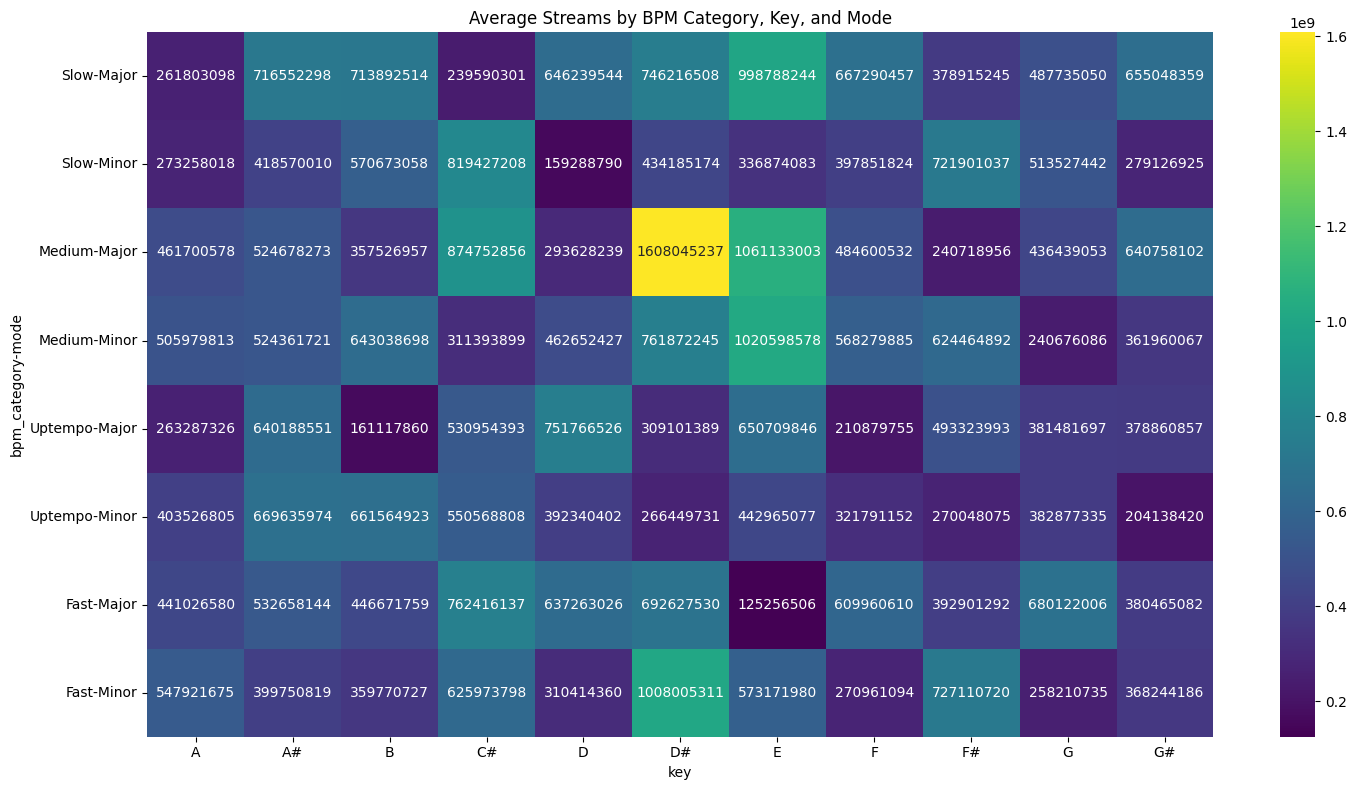

In [44]:

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='viridis')
plt.title('Average Streams by BPM Category, Key, and Mode')
plt.tight_layout()
plt.show()

In [45]:
medium_major_ds = df[(df['bpm_category'] == 'Medium') &
                     (df['mode'] == 'Major') &
                     (df['key'] == 'D#')]

print("Songs in the Medium-Major-D# category:")
print(medium_major_ds[['track_name', 'artist(s)_name', 'streams', 'bpm']].head(10))

Songs in the Medium-Major-D# category:
        track_name artist(s)_name       streams  bpm
591  Before You Go  Lewis Capaldi  1.608045e+09  112


 The intersection of a medium tempo, major mode, and key of D# songs appeared to outperform other combinations when looking at the Heatmap.
 However, this was revealed to be an outlier due to a sample size of 1. That song's streaming numbers inflating the perceived success of this combination.


Considering that analyzing three factors may be excessive, I instead looked at BPM and Mode alone to see if there were any relationships there. Similarly to before, there wasn't a specific combination that outperformed others:

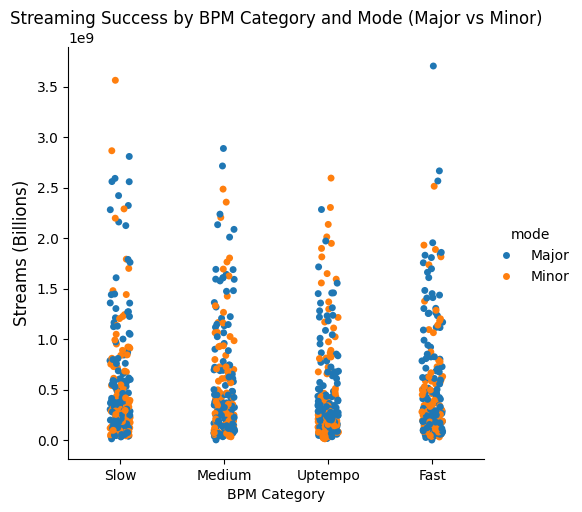

In [46]:
sns.catplot(data=df, x='bpm_category', y='streams', hue='mode')
plt.title('Streaming Success by BPM Category and Mode (Major vs Minor)')
plt.ylabel('Streams (Billions)', fontsize = 12)
plt.xlabel('BPM Category')
plt.show()

With no combination of BPM and Mode outperforming others, I then moved to examine a songs acousticness % vs. streaming numbers, anticipating that electronic music would outperform acoustic styles.

The majority of top songs in 2023 featured few acoustic elements, and indication that electronic music dominated the landscape. However, acousticness alone wasn't a strong predictor of success, given the range of streaming success across the acousticness spectrum. This suggests that electronic vs acoustic production style is less important to streaming success than other factors.

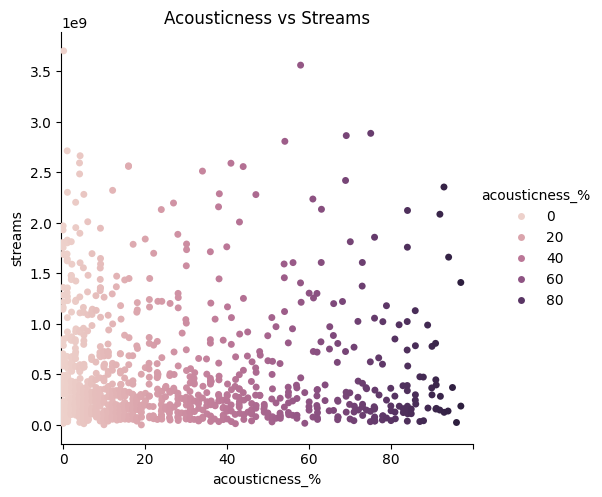

In [47]:

sns.catplot(data = df, x = 'acousticness_%', y = 'streams', hue = 'acousticness_%')
plt.title('Acousticness vs Streams')
plt.xticks([0, 20, 40, 60, 80, 100])
plt.show()


To quantify the relationships between audio features and streaming success, I calculated correlation coefficients for all numeric audio attributes. This statistical measure ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no linear relationship.

By isolating the audio feature variables and examining their correlations with stream counts, I can identify which characteristics have the strongest (or weakest) associations with commercial performance.

In [50]:
audio_features_df = df[['danceability_%', 'valence_%', 'energy_%',
                        'acousticness_%', 'instrumentalness_%',
                        'liveness_%', 'speechiness_%', 'bpm', 'streams']]
corr_matrix = audio_features_df.corr()
print(corr_matrix)

                    danceability_%  valence_%  energy_%  acousticness_%  \
danceability_%            1.000000   0.408451  0.198095       -0.236165   
valence_%                 0.408451   1.000000  0.357612       -0.081907   
energy_%                  0.198095   0.357612  1.000000       -0.577344   
acousticness_%           -0.236165  -0.081907 -0.577344        1.000000   
instrumentalness_%       -0.089138  -0.132890 -0.038547        0.042796   
liveness_%               -0.077538   0.021278  0.117302       -0.050142   
speechiness_%             0.184977   0.041081 -0.004846       -0.022501   
bpm                      -0.147095   0.041195  0.025794       -0.017694   
streams                  -0.105457  -0.040831 -0.026051       -0.004485   

                    instrumentalness_%  liveness_%  speechiness_%       bpm  \
danceability_%               -0.089138   -0.077538       0.184977 -0.147095   
valence_%                    -0.132890    0.021278       0.041081  0.041195   
energy_%    

I created a heatmap to visualize the results:

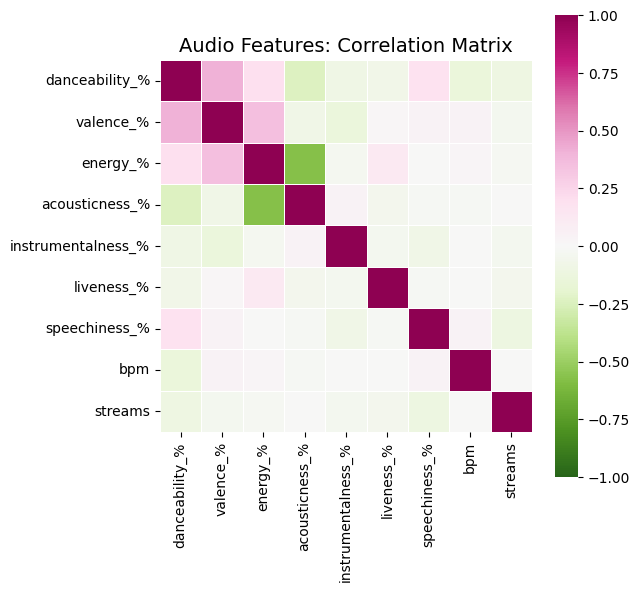

In [52]:
plt.figure(figsize = (6,6))
sns.heatmap(corr_matrix,cmap = 'PiYG_r', vmin = -1, vmax = 1, square = True,
            linewidth = 0.5)
plt.title('Audio Features: Correlation Matrix', fontsize=14)
plt.show()

The correlation heatmap reveals that most audio features show weak relationships with streaming success. The strongest correlation observed is between energy and acousticness (r ≈ -0.57), which is expected - acoustic productions typically register as lower energy compared to electronic/processed music.

 While audio features relate to each other in predictable ways based on production techniques, none serve as reliable predictors of commercial streaming performance. All correlations with streams are weak (|r| < 0.3), with most below |r| < 0.15.

Key Findings:

1. Vocals Are Essential for Commercial Success
Songs with high instrumentalness (primarily instrumental content) consistently underperformed. The presence of vocals appears to be a fundamental requirement for mass streaming appeal, regardless of other production characteristics.

2. Electronic Production Dominates the Landscape
The majority of top-streamed songs featured low acousticness values, indicating that electronic/heavily produced music dominated 2023's streaming charts. However, acoustic songs can still achieve high streaming numbers, suggesting production style alone doesn't determine success.

3. No Predictive Formula Exists
Individual variables (BPM, key, mode) and their combinations showed no meaningful patterns with streaming success. The initial finding of a successful BPM-key-mode combination (Medium-Major-D#) was revealed to be a single-song outlier, demonstrating the importance of sample size validation.

4. Correlation Analysis Confirms Weak Relationships
All audio features demonstrated negligible correlations with streaming performance (|r| < 0.15). This quantitatively confirms that measurable audio characteristics cannot reliably predict commercial success.

Limitations:

This analysis examines only audio characteristics of songs that already achieved significant streaming success. Several important factors could not be captured:

- Marketing spend and promotional strategies
- Playlist placement and algorithmic promotion
- Artist social media presence and fanbase size
- Cultural timing and viral moments
- Radio play and industry connections
- Label support and distribution

Future analysis incorporating these non-musical factors may reveal stronger predictors of streaming success than audio features alone.
